In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

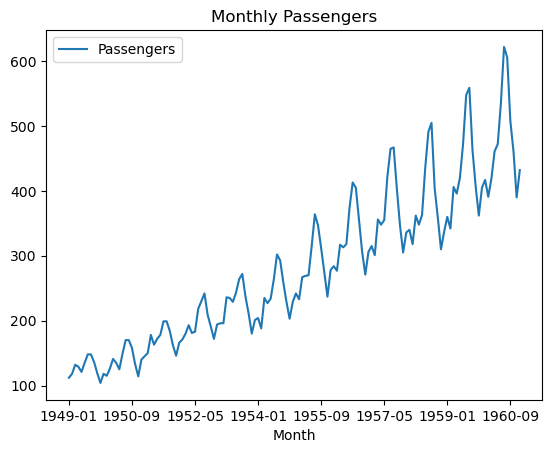

In [80]:
passengers = pd.read_csv("AirPassengers.csv", index_col = 0)
passengers.plot()
plt.title("Monthly Passengers")
plt.show()

In [82]:
# if isinstance(passengers.index, pd.PeriodIndex):
#     passengers.index = passengers.index.to_timestamp()
# print(type(passengers.index))
passengers.index = pd.to_datetime(passengers.index).to_period('M')

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_22800\645800102.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  m_pass = passengers.resample('Q').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

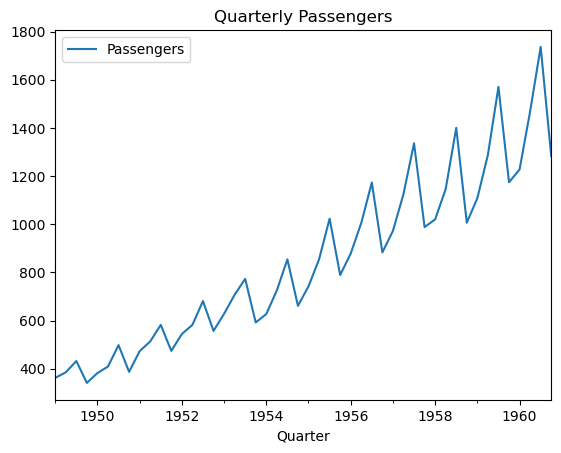

In [86]:
m_pass = passengers.resample('Q').sum()
m_pass.index.rename('Quarter', inplace = True)
m_pass.plot()
plt.title("Quarterly Passengers")
plt.show

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_22800\4231463718.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  m_pass = passengers.resample('Y').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

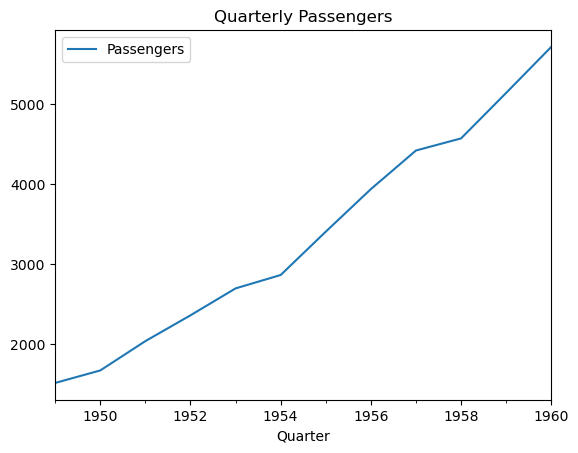

In [92]:
m_pass = passengers.resample('Y').sum()
m_pass.index.rename('Quarter', inplace = True)
m_pass.plot()
plt.title("Quarterly Passengers")
plt.show

## Decomposition

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

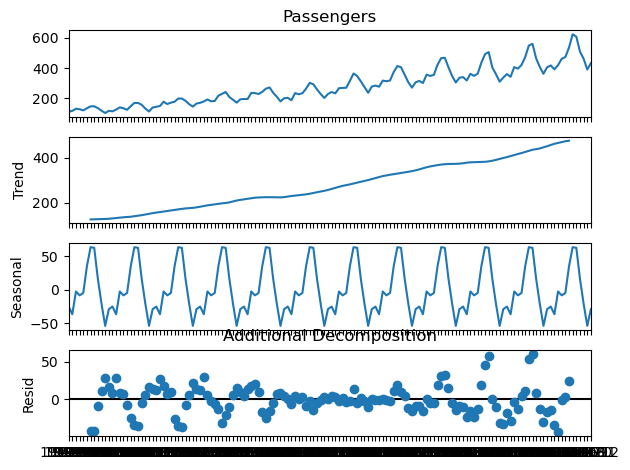

In [111]:
passengers = pd.read_csv("AirPassengers.csv", index_col = 0)
result = seasonal_decompose(passengers['Passengers'], model='additive', period=12)
result.plot()
# fig_size = plt.rcParams(["figure.figsize"])
# fig_size[0] = 7
# fig_size[1] = 7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.title("Additional Decomposition")
plt.show()

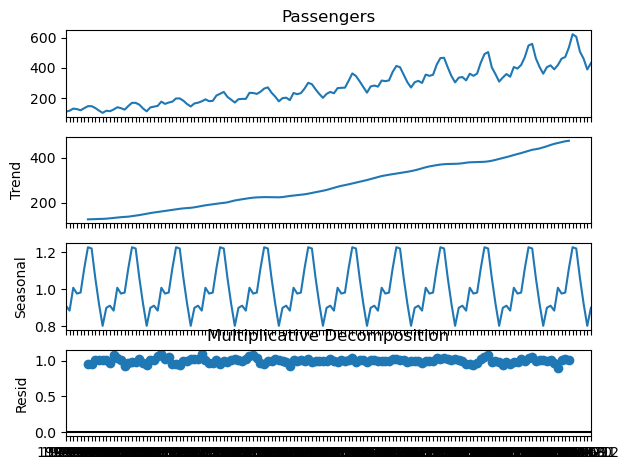

In [101]:
result = seasonal_decompose(passengers['Passengers'], model='multiplicative', period=12)
result.plot()
plt.title("Multiplicative Decomposition")
plt.show()

## Centered Moving Average (Rolling Centered Mean)

In [114]:
y = passengers["Passengers"]

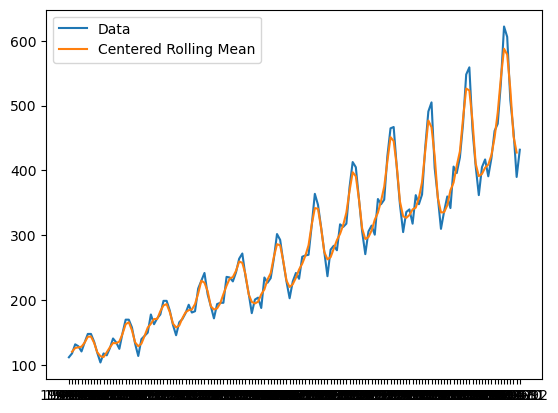

In [128]:
span = 3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label = 'Centered Rolling Mean')
plt.legend(loc = 'best')
plt.show()